In [1]:
from michigrad.engine import Value

# dataset XOR
dataset = [
    ([Value(0), Value(0)], Value(0)), # 0 xor 0 = 0
    ([Value(0), Value(1)], Value(1)), # 0 xor 1 = 1
    ([Value(1), Value(0)], Value(1)), # 1 xor 0 = 1
    ([Value(1), Value(1)], Value(0)), # 1 xor 1 = 0
]

In [2]:
from michigrad.nn import Layer

model = Layer(2, 1, nonlin=False) # 2 inputs, 1 neurona, sin función de activación
#La consigna pide dos neuronas y una capa, pero si respeto eso tendría dos salidas, lo que no tiene sentido con la xor
#Para usar dos neuronas medio que sí o sí tendría que usar dos capas, pero eso tampoco es lo que dice la consigna


Grafo después del forward:


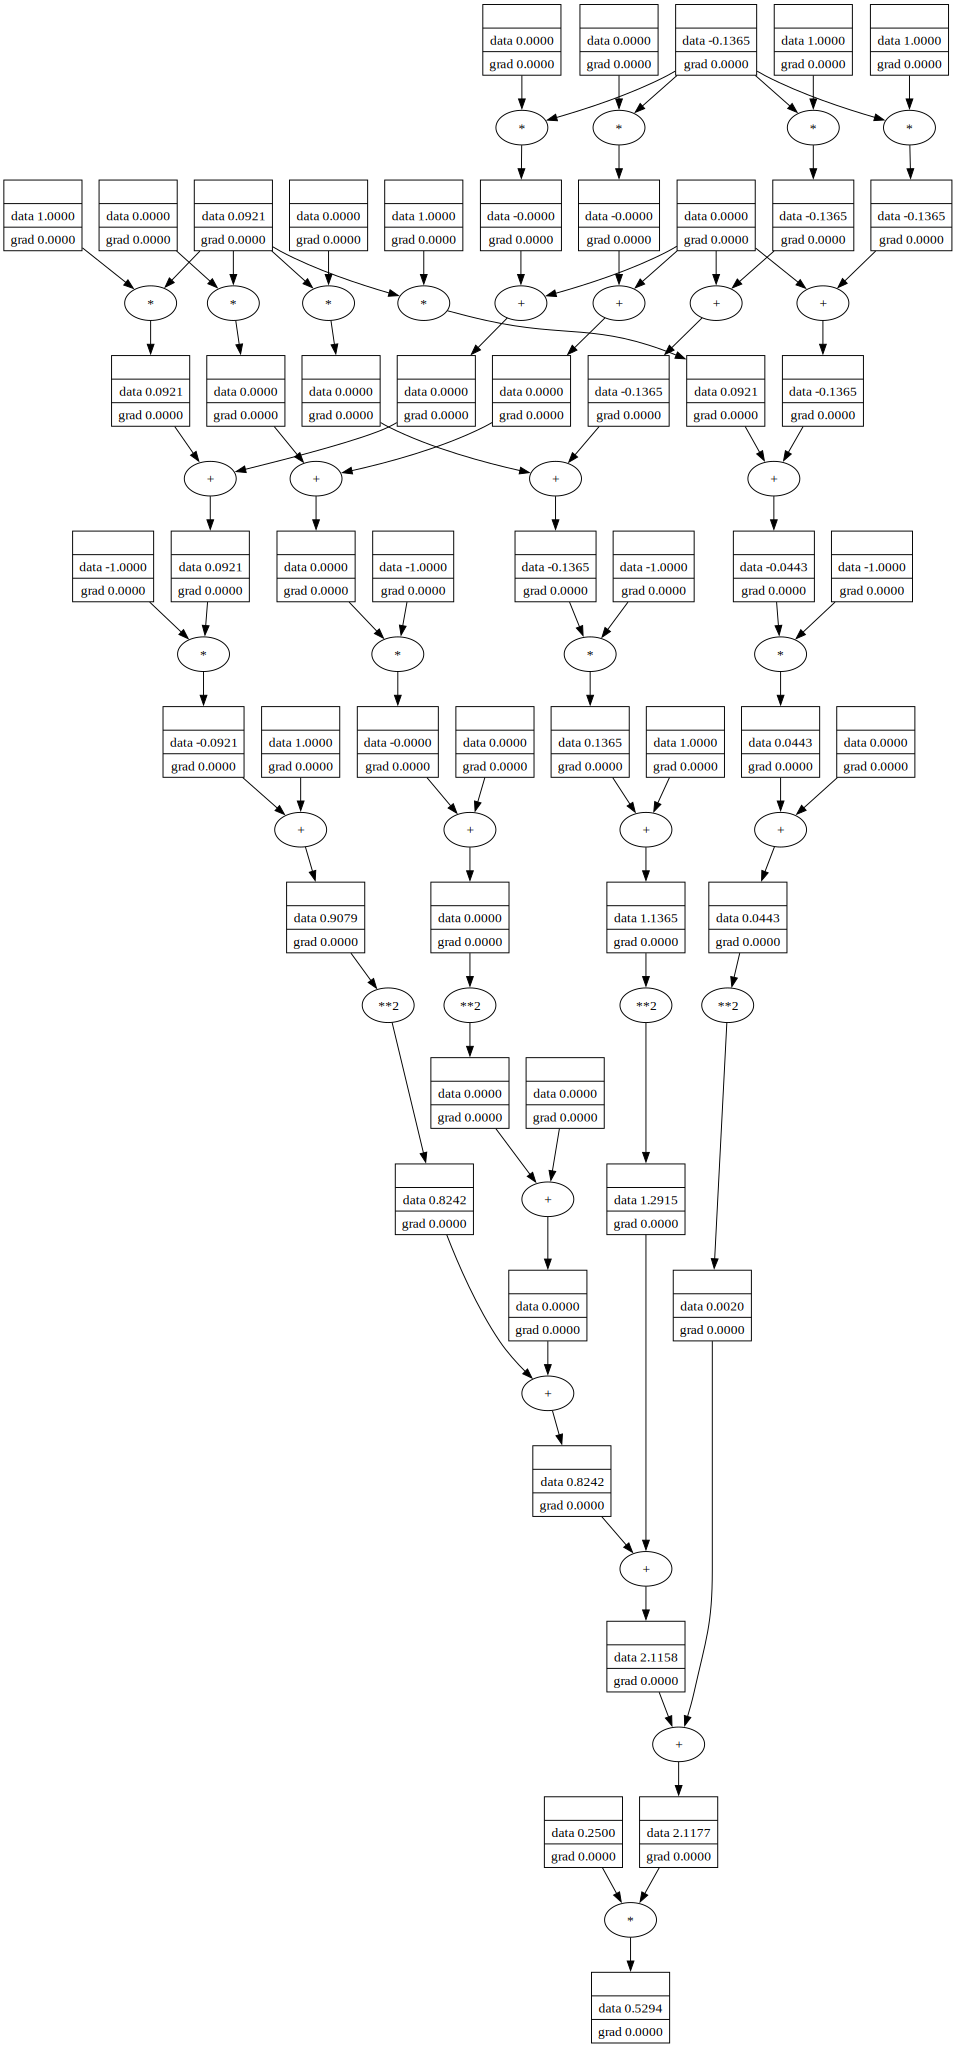

Grafo después del backward:


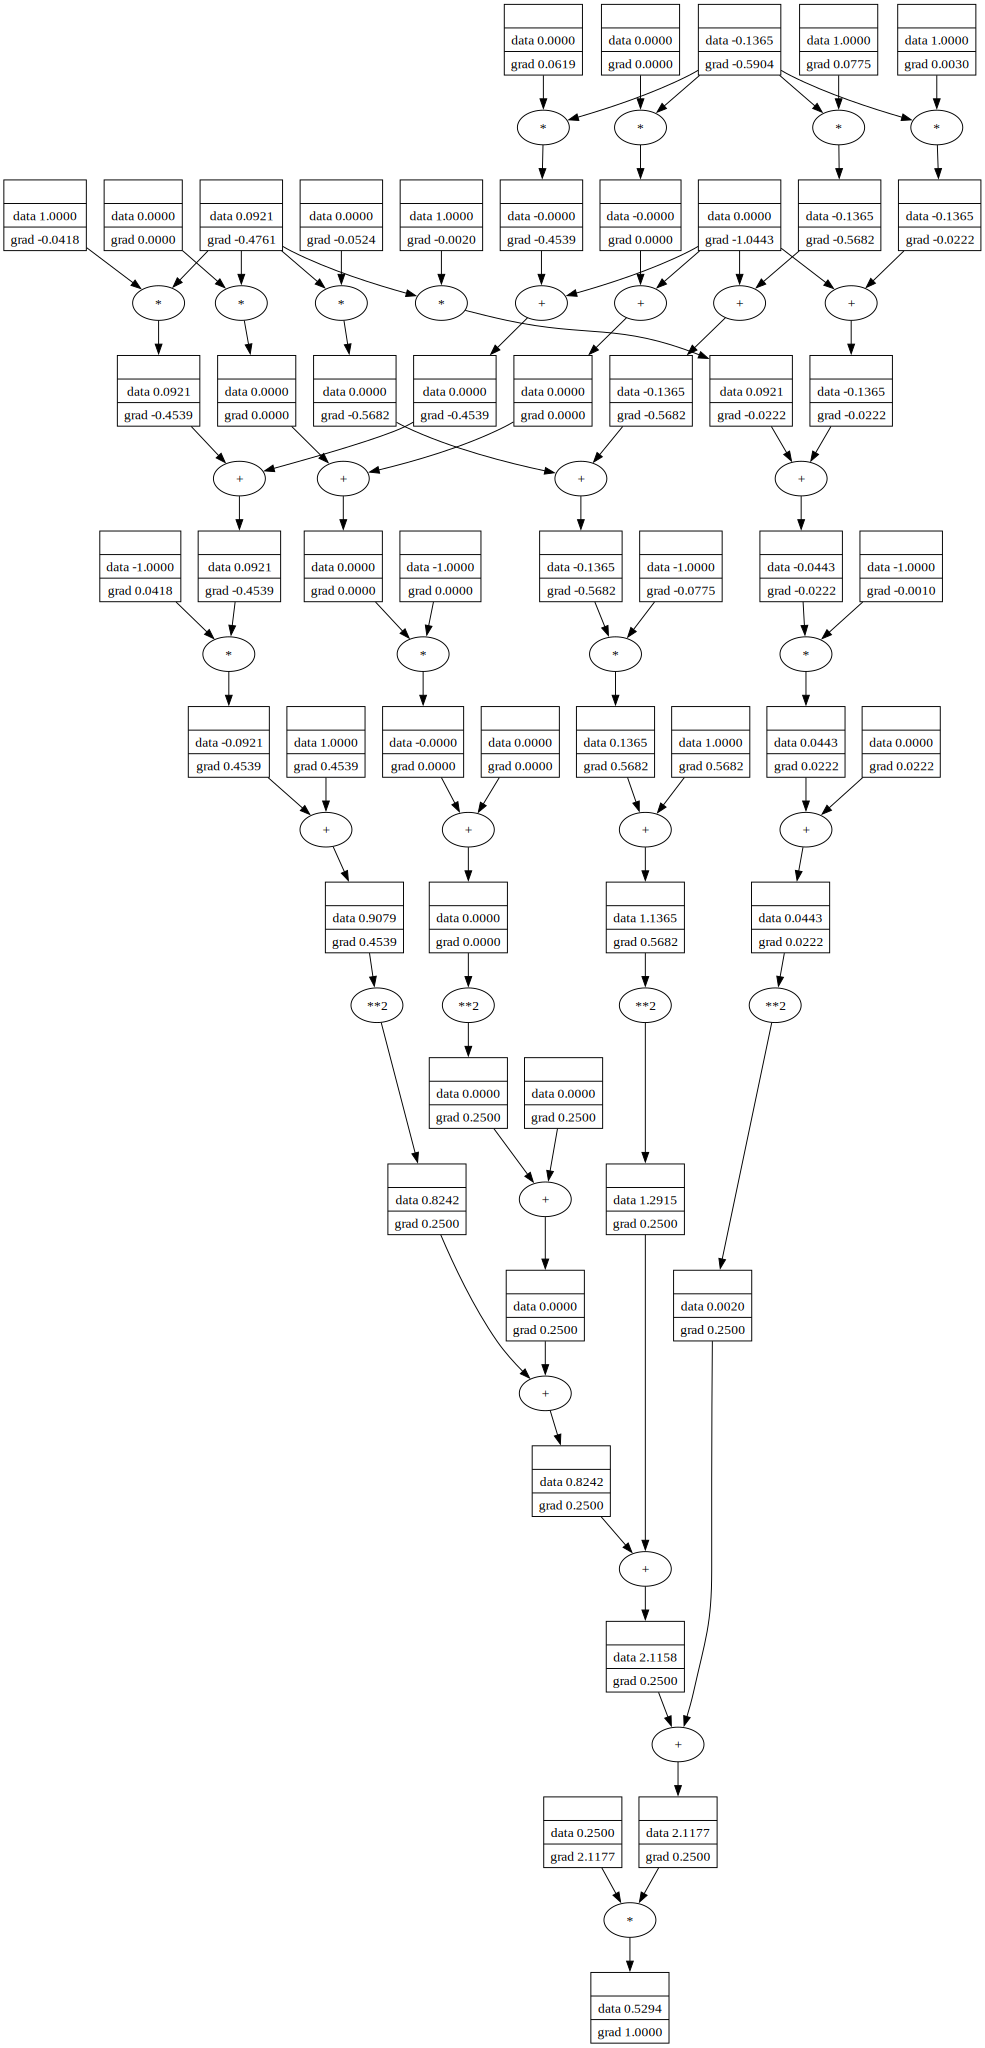

Epoch 0: loss = 0.5294306148251134
Epoch 10: loss = 0.25979209955294114
Epoch 20: loss = 0.2547130960644024
Epoch 30: loss = 0.2523479876433171
Epoch 40: loss = 0.2511896766244158


In [3]:
from michigrad.visualize import show_graph

params = model.parameters()
lr = 0.1   # learning rate

# Entrenamiento
for epoch in range(50):

    # Reseteo loss
    loss = Value(0)

    # Forward: Calculo L con SME
    for x, y in dataset:
        yhat = model(x)
        loss = loss + (y - yhat)**2

    loss = loss * 0.25  # promedio
    if epoch == 0:
      print("Grafo después del forward:")
      dot = show_graph(loss, rankdir="TB", format="png")
      display(dot) #para que me lo umprima Jupyter a pesar de no ser la última línea

    # Reseteo gradientes
    for p in params:
        p.grad = 0

    # Backpropagation
    loss.backward()

    if epoch == 0:
      print("Grafo después del backward:")
      dot = show_graph(loss, rankdir="TB", format="png")
      # para que me lo umprima Jupyter a pesar de no ser la última línea
      display(dot)

    # Descenso del gradiente (actualiza parámetros) 
    for p in params:
        p.data -= lr * p.grad

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss = {loss.data}")

    